# IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# UPLOADING THE DATASET(CSV FORMAT) TO THE WORKSPACE

In [ ]:
data=pd.read_csv('CO2_Emissions.csv')

In [ ]:
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


# EXPLORATORY DATA ANALYSIS

In [ ]:
#I am renaming the columns as they have spaces between them,and also to improve readability of features
data.rename(columns={ 'Engine Size(L)': 'engine_size','Cylinders': 'cylinders','Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                      'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy','Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                      'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg','CO2 Emissions(g/km)': 'co2'
                    } , inplace=True)

In [ ]:
data.head()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   engine_size         7385 non-null   float64
 1   cylinders           7385 non-null   int64  
 2   fuel_cons_city      7385 non-null   float64
 3   fuel_cons_hwy       7385 non-null   float64
 4   fuel_cons_comb      7385 non-null   float64
 5   fuel_cons_comb_mpg  7385 non-null   int64  
 6   co2                 7385 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 404.0 KB
None


In [ ]:
data.describe()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
data.shape

(7385, 7)

In [ ]:
data.isnull().sum()

,0
engine_size,0
cylinders,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0
fuel_cons_comb_mpg,0
co2,0


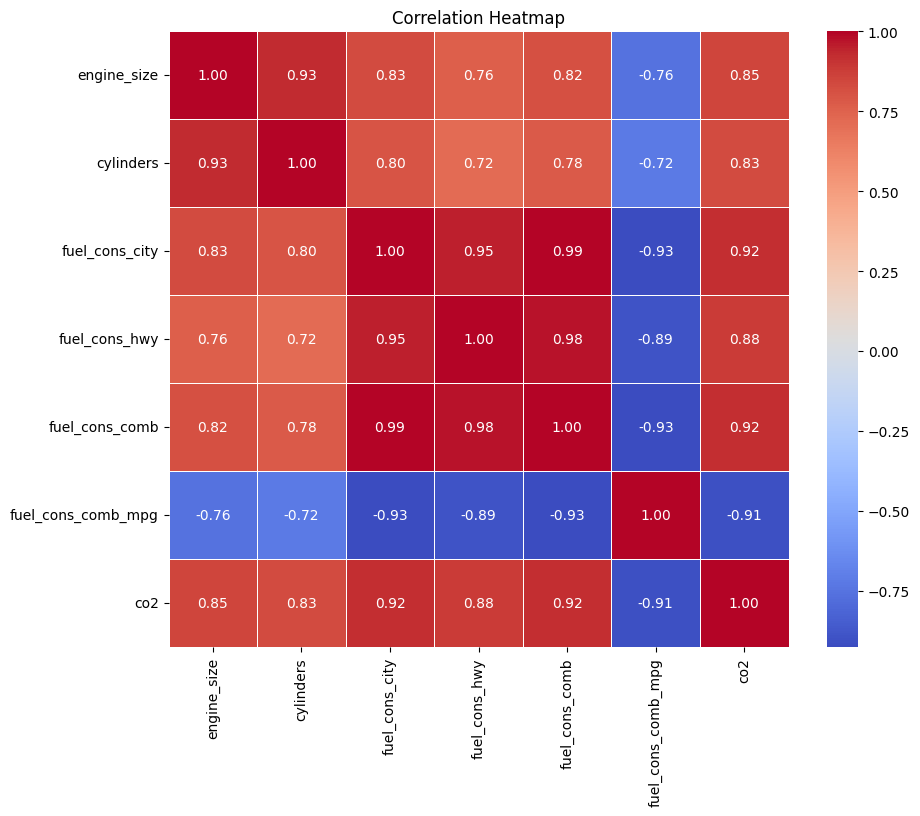

In [ ]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Dropping the redundant features(which are highly correlated with each other)
data.drop(columns=['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb_mpg'], inplace=True)

In [ ]:
data

,engine_size,cylinders,fuel_cons_comb,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7380,2.0,4,9.4,219
7381,2.0,4,9.9,232
7382,2.0,4,10.3,240
7383,2.0,4,9.9,232


In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# SCALING THE NECESSARY FEATURES

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x.shape

(7385, 3)

In [ ]:
x

array([[-0.85672099, -0.88340757, -0.85574185],
       [-0.5613172 , -0.88340757, -0.47542306],
       [-1.22597573, -0.88340757, -1.75467716],
       ...,
       [-0.85672099, -0.88340757, -0.23340202],
       [-0.85672099, -0.88340757, -0.37169976],
       [-0.85672099, -0.88340757, -0.09510428]])

# SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Predicting the Test set results

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([243.31052887, 200.93236303, 256.83307024, ..., 228.66076015,
       170.66557481, 220.75232578])

# EVALUATING THE MODEL NOW

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 13.56
Mean Squared Error: 421.59
Root Mean Squared Error: 20.53
R-squared: 0.88


# VISUALISING THE RESULT

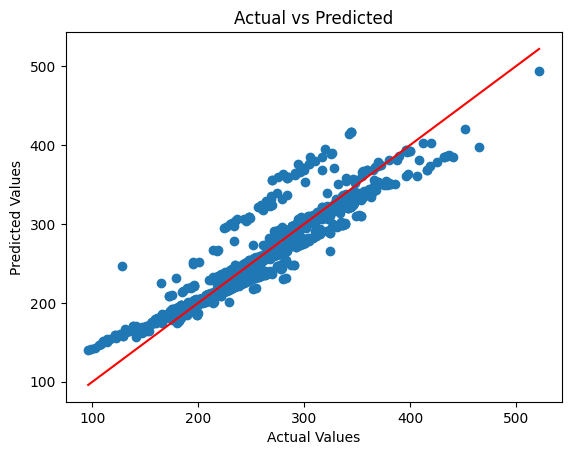

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
